In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# Import the datasets
df = pd.read_csv("/content/sample_data/train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Explore Data

In [92]:
#remove irrelevent data
df = df.drop(columns=["PassengerId","Name","Ticket"])
print(df.head())
print(df.shape)

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500   NaN        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250   NaN        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500   NaN        S
(891, 9)


In [93]:
for i in df.columns: 
  print(i,df[i].dtypes,"\n",df[i].unique())

Survived int64 
 [0 1]
Pclass int64 
 [3 1 2]
Sex object 
 ['male' 'female']
Age float64 
 [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
SibSp int64 
 [1 0 3 4 2 5 8]
Parch int64 
 [0 1 2 5 3 4 6]
Fare float64 
 [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.

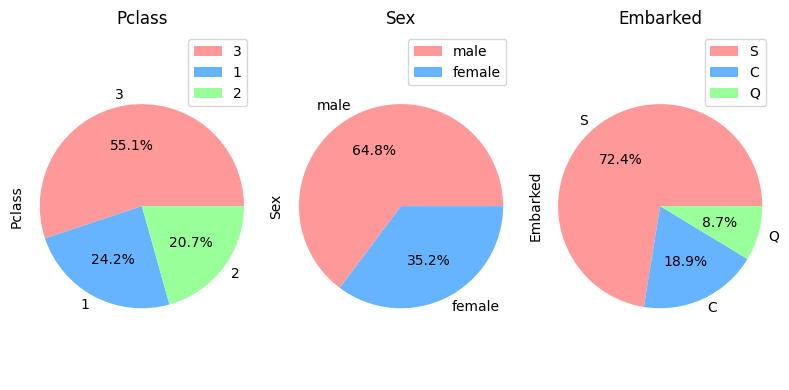

In [94]:
# define the function for customizing the pie charts
def customize_pie_chart(counts, title, ax):
    colors = ['#ff9999','#66b3ff','#99ff99']
    counts.plot.pie(autopct='%1.1f%%', colors=colors, ax=ax)
    ax.set_title(title, fontsize=12)
    ax.legend(labels=counts.index, loc="best")
    ax.axis('equal')


# create a figure with three subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4))

# create pie chart for the Pclass column
customize_pie_chart(df['Pclass'].value_counts(), "Pclass", ax=ax1)

# create pie chart for the Sex column
customize_pie_chart(df['Sex'].value_counts(), "Sex", ax=ax2)

# create pie chart for the Embarked column
customize_pie_chart(df['Embarked'].value_counts(), "Embarked", ax=ax3)

# set the layout to tight
plt.tight_layout()

# display the chart
plt.show()


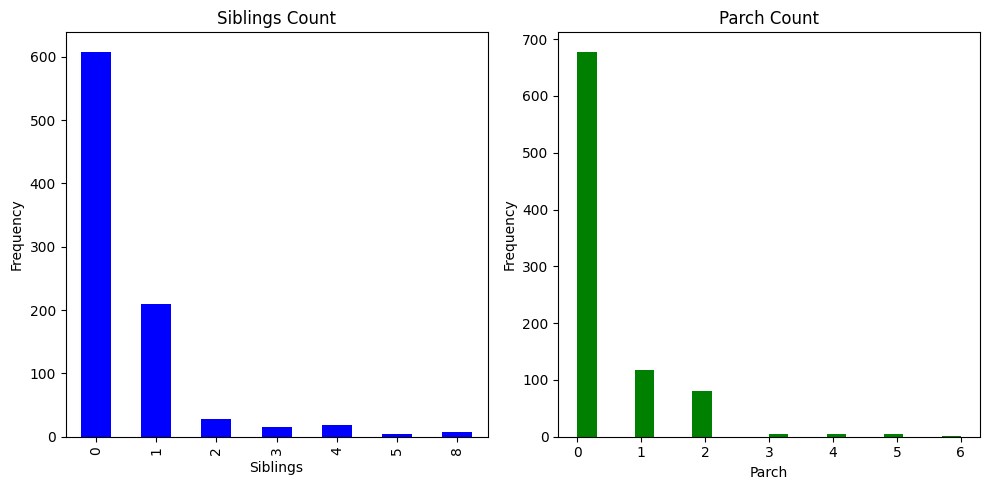

In [95]:
# create a figure with two subplots side by side with horizontal spacing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


# create bar chart for the Age column
df['SibSp'].value_counts().sort_index().plot(kind='bar', color='blue', ax=ax1)
ax1.set_title('Siblings Count')
ax1.set_xlabel('Siblings')
ax1.set_ylabel('Frequency')

# create histogram for the Fare column
df['Parch'].plot(kind='hist', bins=20, color='green', ax=ax2)
ax2.set_title('Parch Count')
ax2.set_xlabel('Parch')
ax2.set_ylabel('Frequency')

# set the layout to tight
plt.tight_layout()

# display the chart
plt.show()

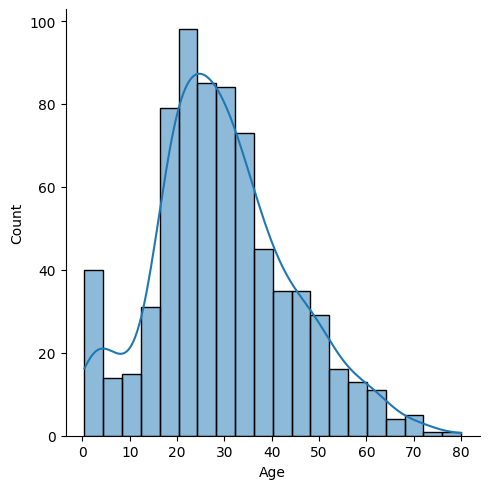

In [96]:
import seaborn as sns
sns.displot(data=df["Age"],kde=True)
plt.show()

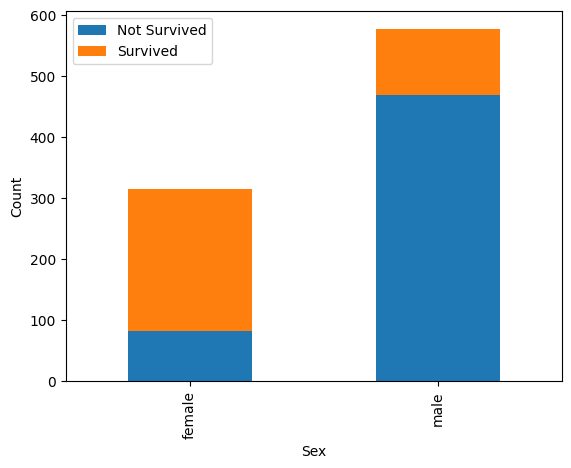

In [97]:
# group the data by gender and survival
grouped = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# plot the grouped data
ax = grouped.plot(kind='bar', stacked=True)

# set the x-label and y-label
plt.xlabel('Sex')
plt.ylabel('Count')

# add a legend
ax.legend(['Not Survived', 'Survived'])

# show the plot
plt.show()

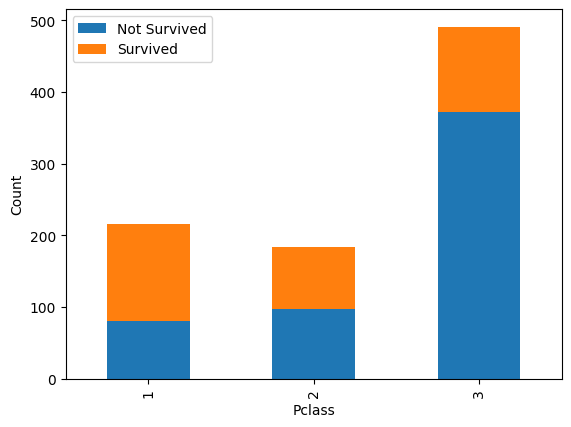

In [98]:
# group the data by gender and survival
grouped = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

# plot the grouped data
ax = grouped.plot(kind='bar', stacked=True)

# set the x-label and y-label
plt.xlabel('Pclass')
plt.ylabel('Count')

# add a legend
ax.legend(['Not Survived', 'Survived'])

# show the plot
plt.show()

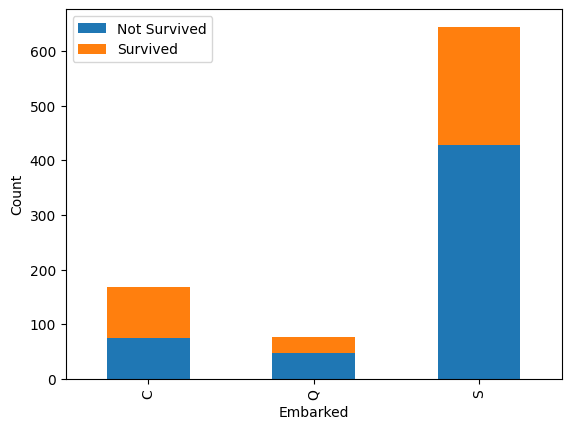

In [99]:
# group the data by gender and survival
grouped = df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

# plot the grouped data
ax = grouped.plot(kind='bar', stacked=True)

# set the x-label and y-label
plt.xlabel('Embarked')
plt.ylabel('Count')

# add a legend
ax.legend(['Not Survived', 'Survived'])

# show the plot
plt.show()

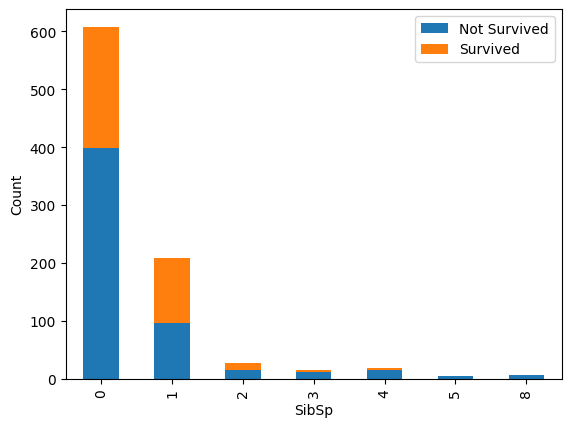

In [100]:
# group the data by Siblings number and survival
grouped = df.groupby(['SibSp', 'Survived']).size().unstack(fill_value=0)

# plot the grouped data
ax = grouped.plot(kind='bar', stacked=True)

# set the x-label and y-label
plt.xlabel('SibSp')
plt.ylabel('Count')

# add a legend
ax.legend(['Not Survived', 'Survived'])

# show the plot
plt.show()

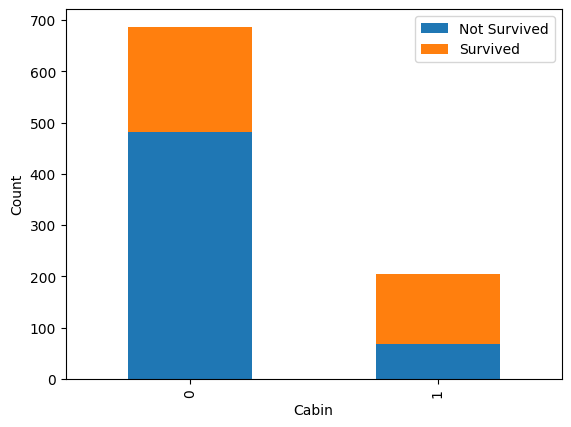

In [101]:
import matplotlib.pyplot as plt

# create a new DataFrame with Cabin and Survived columns
df2 = df[['Cabin', 'Survived']].copy()

# replace string values with 1 and NaN values with 0 in the Cabin column
df2['Cabin'] = df2['Cabin'].apply(lambda x: 1 if isinstance(x, str) else 0)

# group the data by Cabin and Survived columns and count the values
grouped = df2.groupby(['Cabin', 'Survived']).size().unstack(fill_value=0)

# plot the stacked bar chart
ax = grouped.plot(kind='bar', stacked=True)

# set the x-label and y-label
ax.set_xlabel('Cabin')
ax.set_ylabel('Count')

# add a legend
ax.legend(['Not Survived', 'Survived'])

# show the plot
plt.show()


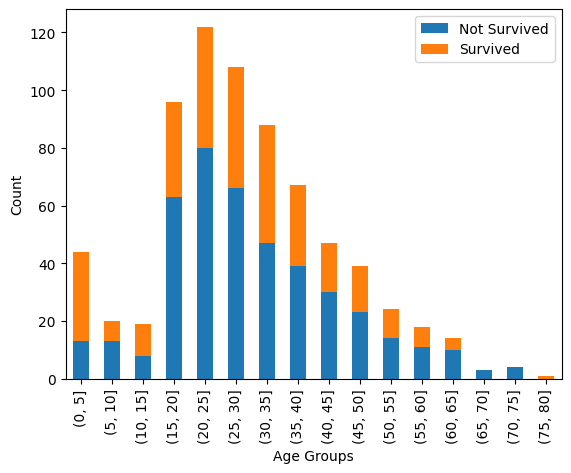

In [102]:
# create age intervals of 5 years
age_intervals = range(0, 85, 5)

# group the data by age intervals and survival
df2['AgeGroup'] = pd.cut(df['Age'], age_intervals)
grouped = df2.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)

# plot the grouped data
ax = grouped.plot(kind='bar', stacked=True)

# set the x-label and y-label
plt.xlabel('Age Groups')
plt.ylabel('Count')

# add a legend
ax.legend(['Not Survived', 'Survived'])

# show the plot
plt.show()


Transform the Data

In [53]:
# Replace "male" with 1 and "female" with 0
df['Sex'] = df['Sex'].replace({'male': 1, 'female': 0})
# Replace the missing values of Age with the median 
df['Age'] = df['Age'].fillna(df['Age'].median())
# turn Embarked column values into dummy ones
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = pd.get_dummies(df,columns=['Embarked'])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# define a dictionary to replace string values with 1
replace_dict = {s:1 for s in df['Cabin'].unique() if isinstance(s, str)}

# replace string values with 1 and fill NaN values with 0
df['Cabin'] = df['Cabin'].replace(replace_dict).fillna(0)

print(df)
df.head()

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked_C  \
0           0       3    1  22.0      1      0   7.2500    0.0           0   
1           1       1    0  38.0      1      0  71.2833    1.0           1   
2           1       3    0  26.0      0      0   7.9250    0.0           0   
3           1       1    0  35.0      1      0  53.1000    1.0           0   
4           0       3    1  35.0      0      0   8.0500    0.0           0   
..        ...     ...  ...   ...    ...    ...      ...    ...         ...   
886         0       2    1  27.0      0      0  13.0000    0.0           0   
887         1       1    0  19.0      0      0  30.0000    1.0           0   
888         0       3    0  28.0      1      2  23.4500    0.0           0   
889         1       1    1  26.0      0      0  30.0000    1.0           1   
890         0       3    1  32.0      0      0   7.7500    0.0           0   

     Embarked_Q  Embarked_S  
0             0           1  
1  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0.0,0,0,1
1,1,1,0,38.0,1,0,71.2833,1.0,1,0,0
2,1,3,0,26.0,0,0,7.9250,0.0,0,0,1
3,1,1,0,35.0,1,0,53.1000,1.0,0,0,1
4,0,3,1,35.0,0,0,8.0500,0.0,0,0,1


Build The model

In [54]:
#split the data into dependent and independent variables

#independent variables
X = df.drop('Survived', axis=1).copy()
print(X)
print(X.shape)


#dependent variable
y = df['Survived'].copy()
print(y)
print(y.shape)


#split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

     Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked_C  Embarked_Q  \
0         3    1  22.0      1      0   7.2500    0.0           0           0   
1         1    0  38.0      1      0  71.2833    1.0           1           0   
2         3    0  26.0      0      0   7.9250    0.0           0           0   
3         1    0  35.0      1      0  53.1000    1.0           0           0   
4         3    1  35.0      0      0   8.0500    0.0           0           0   
..      ...  ...   ...    ...    ...      ...    ...         ...         ...   
886       2    1  27.0      0      0  13.0000    0.0           0           0   
887       1    0  19.0      0      0  30.0000    1.0           0           0   
888       3    0  28.0      1      2  23.4500    0.0           0           0   
889       1    1  26.0      0      0  30.0000    1.0           1           0   
890       3    1  32.0      0      0   7.7500    0.0           0           1   

     Embarked_S  
0             1  
1  

DecisionTreeClassifier(random_state=42)

Visualize the First Tree

[Text(0.4144367301551095, 0.9761904761904762, 'Pclass <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]\nclass = Not Survived'),
 Text(0.13731751824817517, 0.9285714285714286, 'Survived <= 2.5\ngini = 0.386\nsamples = 245\nvalue = [64, 181]\nclass = Survived'),
 Text(0.03832116788321168, 0.8809523809523809, 'Sex <= 2.5\ngini = 0.074\nsamples = 130\nvalue = [5, 125]\nclass = Survived'),
 Text(0.014598540145985401, 0.8333333333333334, 'SibSp <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Not Survived'),
 Text(0.0072992700729927005, 0.7857142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'),
 Text(0.021897810218978103, 0.7857142857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Not Survived'),
 Text(0.06204379562043796, 0.8333333333333334, 'Sex <= 27.5\ngini = 0.061\nsamples = 128\nvalue = [4, 124]\nclass = Survived'),
 Text(0.0364963503649635, 0.7857142857142857, 'Sex <= 24.5\ngini = 0.12\nsamples = 47\nvalue = [3, 44]\nclass = Survived'),


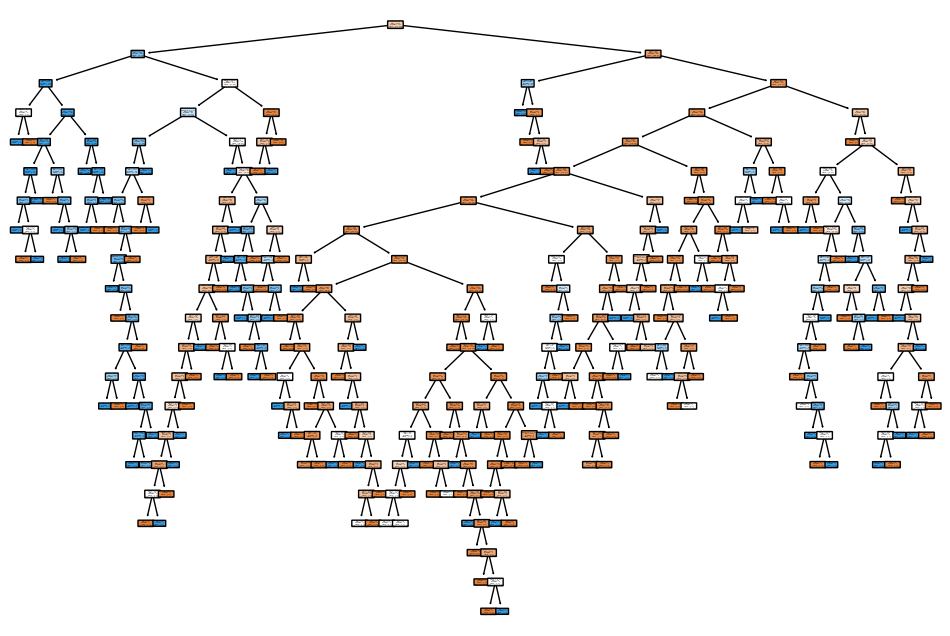

In [55]:
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True,rounded=True,class_names=["Not Survived","Survived"],feature_names=df.columns)

Cost Complexity Pruning Part 1 : Visualize alpha

In [73]:
path = clf.cost_complexity_pruning_path(X_train,y_train) #determine values for alpha
ccp_alphas = path.ccp_alphas #extract different values for alpha
ccp_alphas = ccp_alphas[:-1] #exclude the maximum value for alpha
clf_dts = [] #create an array tgat we will put decision trees into 
for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf_dt.fit(X_train,y_train)
  clf_dts.append(clf_dt)

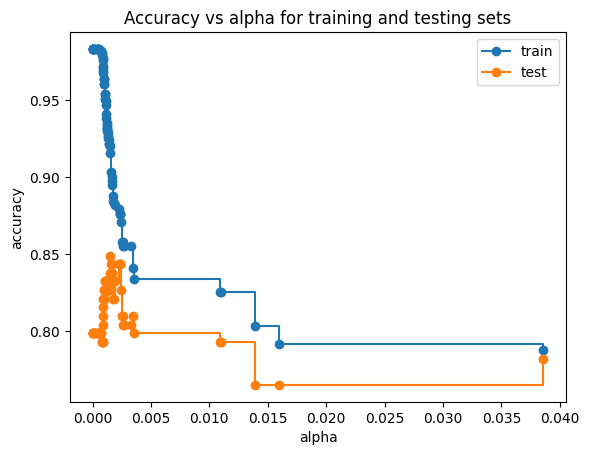

In [104]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Cross Complexity Prunining : Cross Validation for Finding the Best Alpha

<Axes: xlabel='tree'>

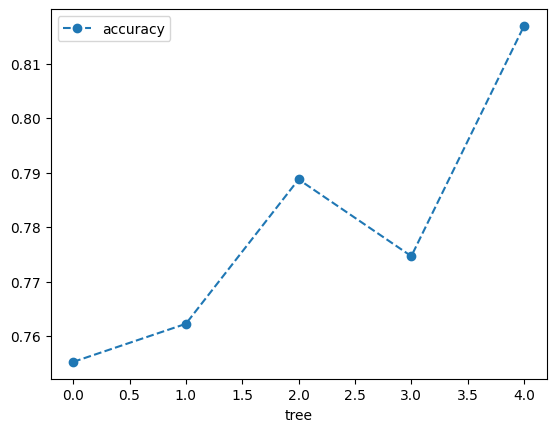

In [105]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0015) #create the tree with ccp_alpha=0.0015
#now use 5-fold cross validation create 5 different training and testing datasets that are then used to train and test the tree
#note: we use 5-fold cross validation because we don't have tons of data

scores = cross_val_score(clf_dt, X_train,y_train, cv=5)
df_tree = pd.DataFrame(data={'tree':range(5),'accuracy':scores})
df_tree.plot(x='tree',y='accuracy',marker='o',linestyle='--')

<Axes: xlabel='alpha'>

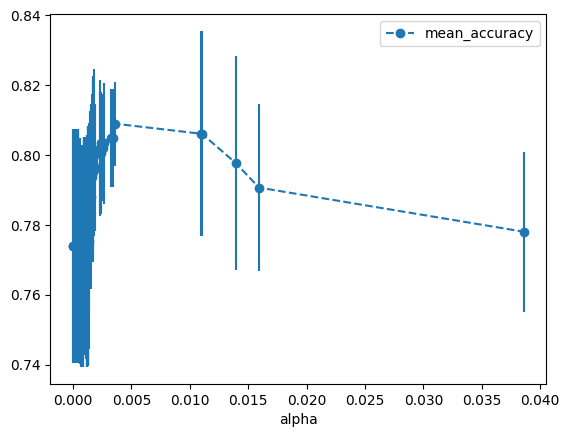

In [106]:
alpha_loop_values=[]
# for each akpha value, we run 5-fold cross validation
# then we will store the mean and the standard deviation of the scores (the accuracy) for each call
#to cross_cal_score in alpha_loop_values
for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  scores = cross_val_score(clf_dt,X_train,y_train, cv=5)
  alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])

#now we can draw a graph of the means and standard deviations of the scores
#for each candidate value for alpha 

alpha_results = pd.DataFrame(alpha_loop_values, columns = ['alpha','mean_accuracy','std'])
alpha_results.plot(x="alpha",y="mean_accuracy",yerr="std",marker="o",linestyle='--')

In [107]:
alpha_results[(alpha_results['alpha']>0.0) & (alpha_results['alpha']<0.005)]
ideal_ccp_alpha = alpha_results.loc[alpha_results['mean_accuracy'].idxmax(), 'alpha']
ideal_ccp_alpha

0.003563275701017494

In [108]:
#convert ideal_ccp_alpha from a series to a float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.003563275701017494

New Decision Tree

In [79]:
#Build and train a new decision tree, only this time use the optimal value for alpha
clf_dt_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha,max_depth=5)
clf_dt_pruned = clf_dt_pruned.fit(X_train,y_train)

[Text(0.4230769230769231, 0.875, 'Sex <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]\nclass = Not Survived'),
 Text(0.15384615384615385, 0.625, 'Pclass <= 2.5\ngini = 0.386\nsamples = 245\nvalue = [64, 181]\nclass = Survived'),
 Text(0.07692307692307693, 0.375, 'gini = 0.074\nsamples = 130\nvalue = [5, 125]\nclass = Survived'),
 Text(0.23076923076923078, 0.375, 'Fare <= 23.35\ngini = 0.5\nsamples = 115\nvalue = [59, 56]\nclass = Not Survived'),
 Text(0.15384615384615385, 0.125, 'gini = 0.486\nsamples = 94\nvalue = [39, 55]\nclass = Survived'),
 Text(0.3076923076923077, 0.125, 'gini = 0.091\nsamples = 21\nvalue = [20, 1]\nclass = Not Survived'),
 Text(0.6923076923076923, 0.625, 'Age <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]\nclass = Not Survived'),
 Text(0.5384615384615384, 0.375, 'SibSp <= 2.5\ngini = 0.434\nsamples = 22\nvalue = [7, 15]\nclass = Survived'),
 Text(0.46153846153846156, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = Survived'),
 Text(0.6

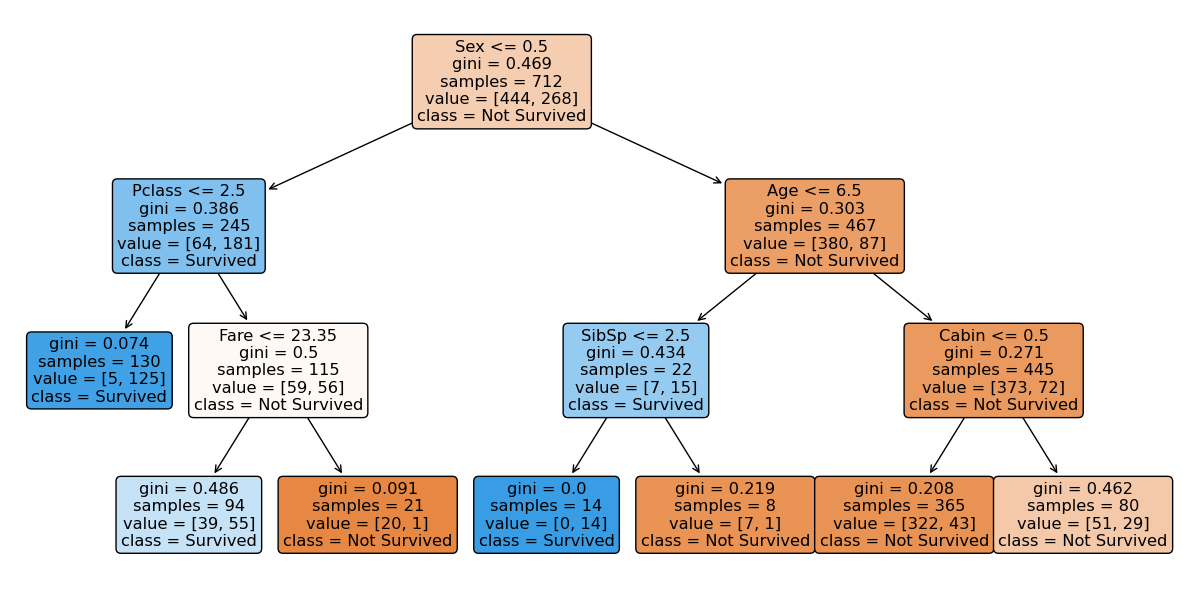

In [80]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=["Not Survived","Survived"],feature_names=X.columns)

Model Accuracy

Accuracy: 0.7988826815642458


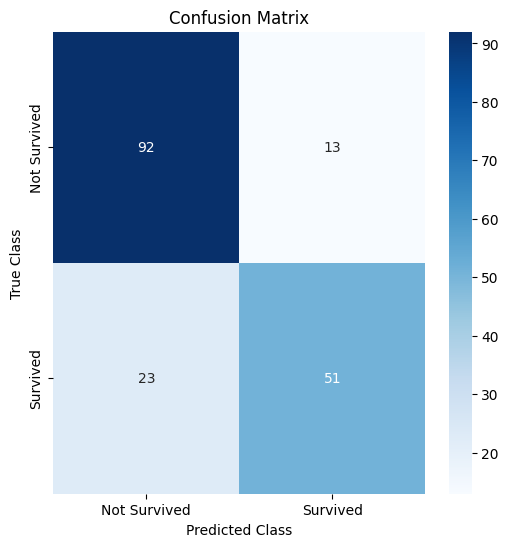

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Use the pruned decision tree to make predictions on the test set
y_pred = clf_dt_pruned.predict(X_test)

# Calculate the accuracy of the pruned decision tree on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the confusion matrix of the pruned decision tree on the test set
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()